In [71]:
import warnings

warnings.filterwarnings("ignore")

---
Function Untuk Mengambil Datanya

In [72]:
import urllib.request as download
import pandas as pd

def download_read_data(path: str) -> pd.DataFrame:
    data_path = download.urlretrieve(path)[0]
    df = pd.read_csv(str(data_path))
    return df

---
Menyimpan Data Ke Variabel Tertentu

In [73]:
train_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_test.csv'

data_mobile_train = download_read_data(train_data_path)
data_mobile_test = download_read_data(test_data_path)

---
Membuat Function Untuk Mengecek Data Tersebut

In [74]:
def exploration_df(df:pd.DataFrame) -> None:
    information = {"Data Describe's": df.describe(), "Data Null Information's": df.isnull().sum(), "Data Duplicate's": df.duplicated().sum()}
    print("\n"+"---> "+"Data Info's"+" <---"+"\n")
    df.info()

    for key, data in information.items():
        print("\n"+"---> "+key+" <---"+"\n")
        print(data)

# **Column Description :**
- batter_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Bytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are talking
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

---
Mengecek Model Apakah Data Tersebut Tidak Kosong, Tidak Sama, Dan Tidak Beda Dtype

In [75]:
exploration_df(data_mobile_train)


---> Data Info's <---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null

In [76]:
exploration_df(data_mobile_test)


---> Data Info's <---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null 

---
Melihat Hubungan Antar Column

<Axes: >

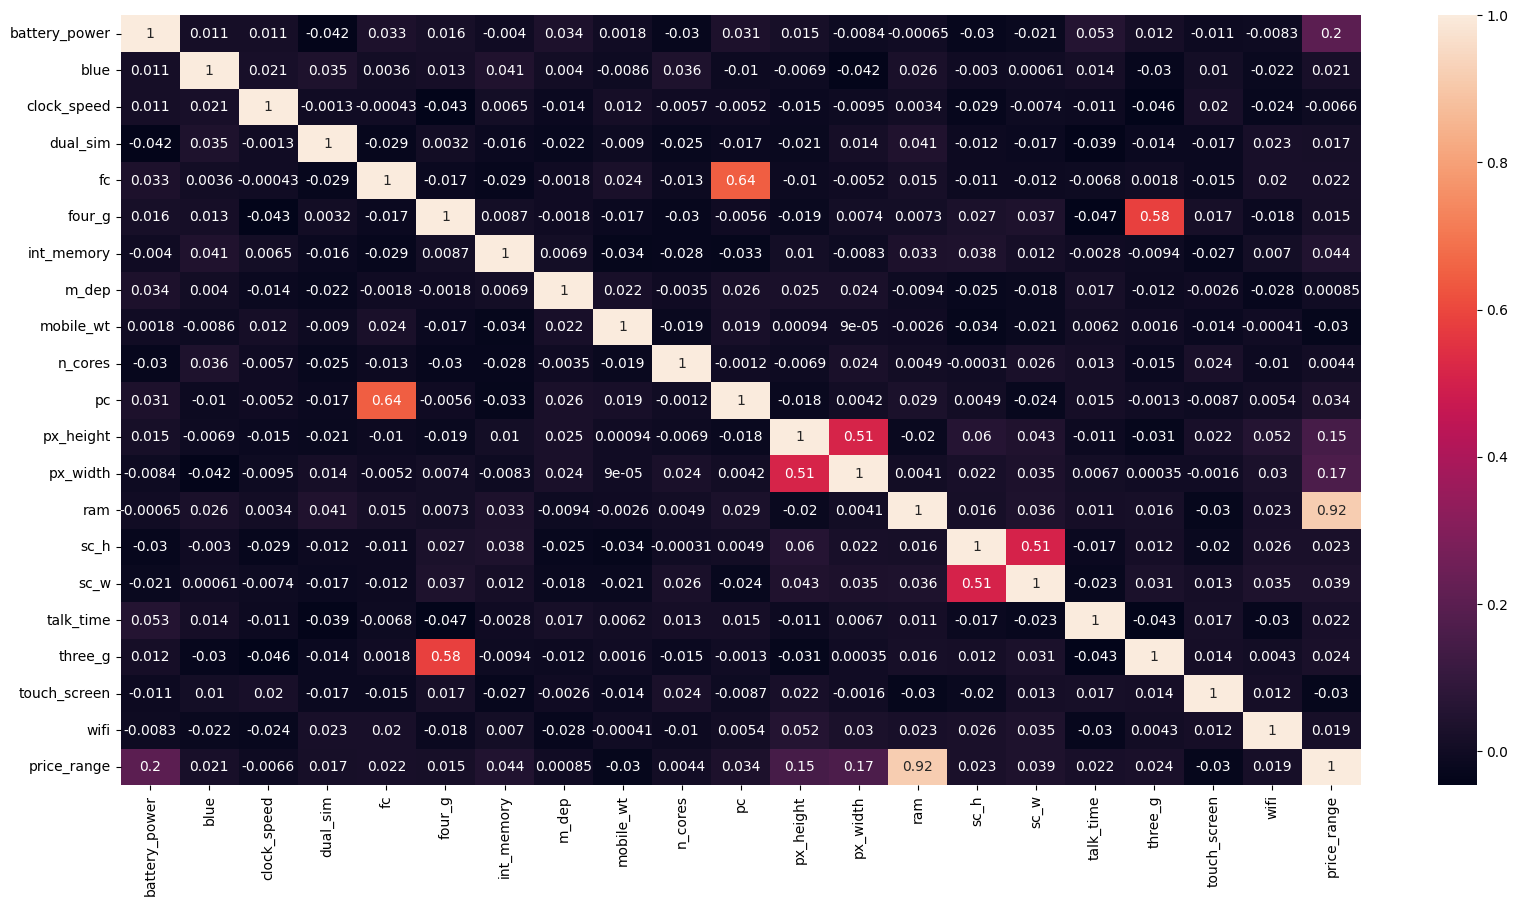

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data_mobile_train.corr(), annot=True)

---
Mengubah Data Sebelumnya Menjadi Data Yang Optimal Untuk Model

In [78]:
from sklearn.preprocessing import MinMaxScaler

mms_model =  MinMaxScaler()

data_train_mms = mms_model.fit_transform(data_mobile_train.drop("price_range", axis=1))
data_test_mms = mms_model.fit_transform(data_mobile_test.drop("id", axis=1))
y = data_mobile_train["price_range"]

---
Menerapkan Model Ke Variabel

In [79]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

log_model = LogisticRegression()
clf_model = DecisionTreeClassifier()
sgd_model = SGDClassifier()

---
Membuat Function Untuk Mengevaluasi Model

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_predict(y_true, y_pred) -> None:
    print("\nAccuracy Score:\n", accuracy_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

---
Memisahkan Data Menjadi Data Test Dan Data Train

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train_mms, y, test_size=0.1, random_state=42)

---
Melatih Model

In [82]:
log_model.fit(X_train, y_train)
clf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

SGDClassifier()

---
Cek Score Pada Model 'log_model'

In [83]:
y_pred = log_model.predict(X_test)
evaluate_predict(y_test, y_pred)


Accuracy Score:
 0.93

Confusion Matrix:
 [[59  0  0  0]
 [ 1 43  5  0]
 [ 0  3 38  4]
 [ 0  0  1 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.93      0.88      0.91        49
           2       0.86      0.84      0.85        45
           3       0.92      0.98      0.95        47

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [84]:
from sklearn.model_selection import cross_val_score

print("\nScore Data Train:\n", log_model.score(X_train, y_train), "\n", cross_val_score(log_model, X_train, y_train, cv=10))
print("\nScore Data Test:\n", log_model.score(X_test, y_test), "\n", cross_val_score(log_model, X_test, y_test, cv=10))


Score Data Train:
 0.9411111111111111 
 [0.94444444 0.88333333 0.97222222 0.91111111 0.90555556 0.9
 0.92777778 0.9        0.93333333 0.91666667]

Score Data Test:
 0.93 
 [0.6  0.6  0.6  0.85 0.65 0.65 0.75 0.65 0.8  0.55]


---
Cek Score Model 'clf_model'

In [85]:
y_pred = clf_model.predict(X_test)
evaluate_predict(y_test, y_pred)


Accuracy Score:
 0.845

Confusion Matrix:
 [[53  6  0  0]
 [ 1 43  5  0]
 [ 0  3 32 10]
 [ 0  0  6 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        59
           1       0.83      0.88      0.85        49
           2       0.74      0.71      0.73        45
           3       0.80      0.87      0.84        47

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200



In [86]:
from sklearn.model_selection import cross_val_score

print("\nScore Data Train:\n", clf_model.score(X_train, y_train), "\n", cross_val_score(clf_model, X_train, y_train, cv=10))
print("\nScore Data Test:\n", clf_model.score(X_test, y_test), "\n", cross_val_score(clf_model, X_test, y_test, cv=10))


Score Data Train:
 1.0 
 [0.81111111 0.81111111 0.81111111 0.86666667 0.82222222 0.88888889
 0.83333333 0.80555556 0.80555556 0.82222222]

Score Data Test:
 0.845 
 [0.75 0.8  0.65 0.85 0.8  0.8  0.65 0.7  0.65 0.95]


---
Mengecek Score Model 'sgd_model'

In [87]:
y_pred = sgd_model.predict(X_test)
evaluate_predict(y_test, y_pred)


Accuracy Score:
 0.765

Confusion Matrix:
 [[54  1  4  0]
 [ 0 19 30  0]
 [ 0  5 33  7]
 [ 0  0  0 47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.76      0.39      0.51        49
           2       0.49      0.73      0.59        45
           3       0.87      1.00      0.93        47

    accuracy                           0.77       200
   macro avg       0.78      0.76      0.75       200
weighted avg       0.80      0.77      0.76       200



In [88]:
from sklearn.model_selection import cross_val_score

print("\nScore Data Train:\n", sgd_model.score(X_train, y_train), "\n", cross_val_score(sgd_model, X_train, y_train, cv=10))
print("\nScore Data Test:\n", sgd_model.score(X_test, y_test), "\n", cross_val_score(sgd_model, X_test, y_test, cv=10))


Score Data Train:
 0.7655555555555555 
 [0.78333333 0.72222222 0.77777778 0.85       0.75       0.76666667
 0.7        0.72777778 0.76111111 0.71666667]

Score Data Test:
 0.765 
 [0.6  0.75 0.6  0.8  0.75 0.65 0.75 0.6  0.6  0.75]


---
Jumlah Data Train Dan Data Test

In [89]:
print("length X_train :", len(X_train), "length y_train :", len(y_train), "\nlength X_test  :", len(X_test), " length y_test  :", len(y_test))

length X_train : 1800 length y_train : 1800 
length X_test  : 200  length y_test  : 200


---
Menerapkan Model Dengan Data Tanpa Label

In [90]:
y_pred = log_model.predict(data_test_mms)

price_range_df = pd.DataFrame(y_pred, columns=["price_range"])

In [91]:
data_mobile_test = pd.concat([data_mobile_test, price_range_df], axis=1)
data_mobile_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [92]:
data_mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


---
Total Jumlah Data Dari Column 'price_range'

In [93]:
len(data_mobile_train["price_range"])

2000

---
Melihat Jumlah Dari Masing2 Value

In [94]:
data_mobile_train["price_range"].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


---
melihat berapa yang benar hasil prediksi dengan data label yang sebenarnya

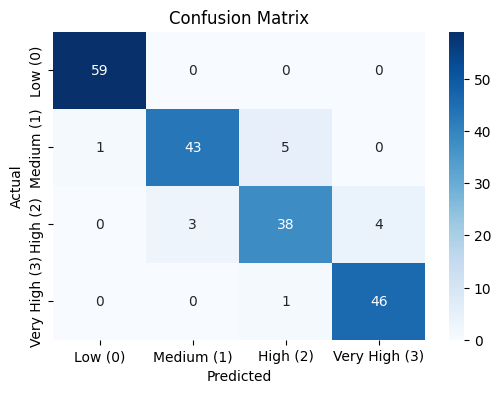

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred = log_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
label_names = ['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretasi:

- Kelas 0: 59 benar, 0 salah → sangat akurat.

- Kelas 1: 43 benar, 6 (1+5) salah → cukup stabil.

- Kelas 2: 38 benar, 7 (3+4) salah → masih oke.

- Kelas 3: 46 benar, 1 salah → sangat baik.

---
Melihat Apakah Model Terjadi Penurunan Atau Kenaikan Pada Cross Validation Score

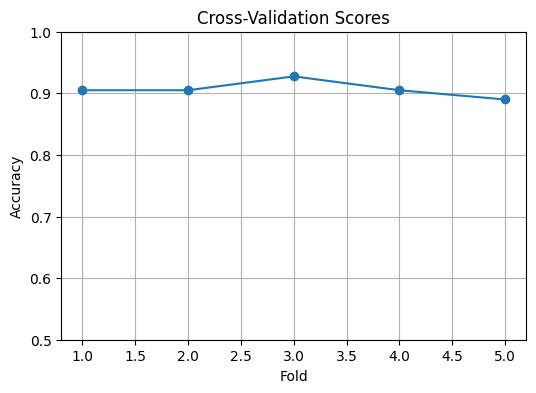

[0.905  0.905  0.9275 0.905  0.89  ]


In [96]:
from sklearn.model_selection import cross_val_score
import numpy as np

y_pred = log_model.predict(data_train_mms)
scores = cross_val_score(log_model, data_train_mms, y_pred, cv=5)
plt.figure(figsize=(6,4))
plt.plot(range(1,6), scores, marker='o')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()
print(scores)

---
Membuat Function 'visualisasi_pengaruh'

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil koefisien
coef_df = pd.DataFrame(log_model.coef_.T, index=data_mobile_train.drop(["price_range"], axis=1).columns, columns=['Class 0', 'Class 1', 'Class 2', 'Class 3'])

def visualisasi_pengaruh(df: pd.DataFrame, jumlah_visuaisasi:int):
    fig, axes = plt.subplots(nrows=jumlah_visuaisasi, ncols=1, figsize=(8, 18))
    columns = list(df.columns)

    for i in range(jumlah_visuaisasi):
        df[columns[i]].sort_values().plot(kind='barh', ax=axes[i], color='teal')
        axes[i].set_title(f'Feature Influence on {columns[i]} Prediction')
        axes[i].set_xlabel('Coefficient Value')
        axes[i].set_ylabel('Feature')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))


# coef_df['Class 1'].sort_values().plot(kind='barh', ax=axes[0], color='teal')
# axes[0].set_title('Feature Influence on Class 1 Prediction')
# axes[0].set_xlabel('Coefficient Value')
# axes[0].set_ylabel('Feature')
# axes[0].grid(True)

# coef_df['Class 2'].sort_values().plot(kind='barh', ax=axes[1], color='teal')
# axes[1].set_title('Feature Influence on Class 2 Prediction')
# axes[1].set_xlabel('Coefficient Value')
# axes[1].set_ylabel('Feature')
# axes[1].grid(True)

# coef_df['Class 3'].sort_values().plot(kind='barh', ax=axes[2], color='teal')
# axes[2].set_title('Feature Influence on Class 3 Prediction')
# axes[2].set_xlabel('Coefficient Value')
# axes[2].set_ylabel('Feature')
# axes[2].grid(True)


# plt.tight_layout()
# plt.show()

---
Menunjukkan Seberapa Pengaruh Dari Masing2 Column Untuk Mempengaruhi Model Dalam Membuat Keputusan

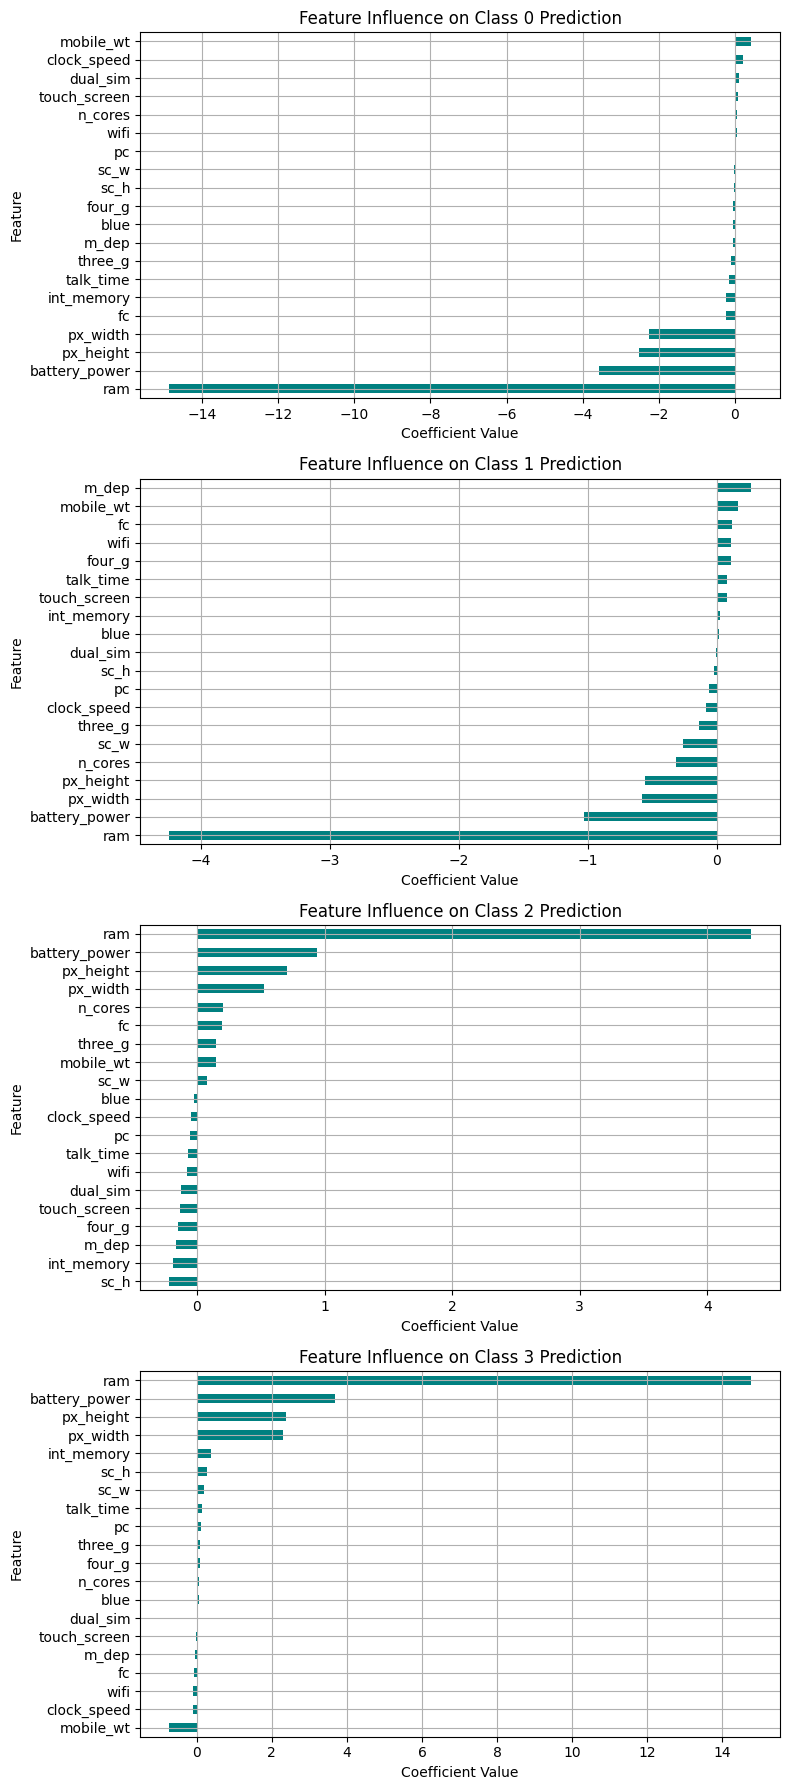

In [98]:
visualisasi_pengaruh(coef_df, 4)

---
melihat berapa yang benar hasil prediksi dengan data label yang sebenarnya

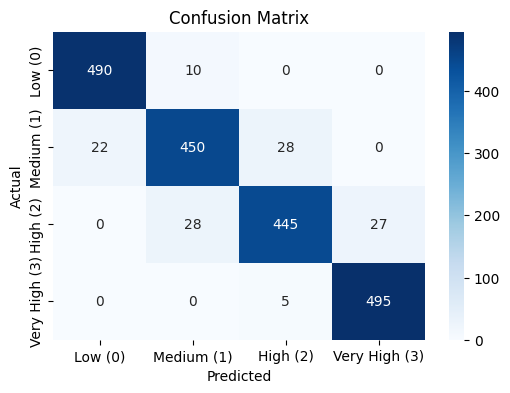

In [99]:
y_pred = log_model.predict(data_train_mms)
cm = confusion_matrix(y, y_pred)

label_names = ['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Interpretasi:

- Kelas 0: 490 benar, 10 salah

- Kelas 1: 450 benar, 50 (22+28) salah

- Kelas 2: 445 benar, 55 (28+27) salah

- Kelas 3: 495 benar, 5 salah